In [40]:
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob

print(tf.__version__)

2.17.0


In [41]:
"""
csv_files = glob.glob('*.{}'.format('csv'),root_dir="./fonts")
for file in csv_files:
    df_csv_append = pd.read_csv("./fonts/" + file)
    df = pd.concat([df,df_csv_append], ignore_index=True)
"""
df = pd.read_csv("fonts_cleaned.csv",index_col=0)

In [42]:
df.head()

,fonts,index,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,Arial.ttf,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,Arial.ttf,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,Arial.ttf,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,Arial.ttf,0,243,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
4,Arial.ttf,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [43]:
arr = np.array(df['fonts'])
classes = pd.unique(arr)
print(len(classes))

122


In [61]:
X = df.drop(columns=['fonts',"index"])
y = df['fonts']
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [46]:
X_train = np.array(X_train / 255.0)
X_test = np.array(X_test / 255.0)
print(X_train.shape)
print(X_train)

(6051, 1024)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [47]:
X_train = X_train.reshape(X_train.shape[0], 32, 32)
X_test = X_test.reshape(X_test.shape[0], 32, 32)

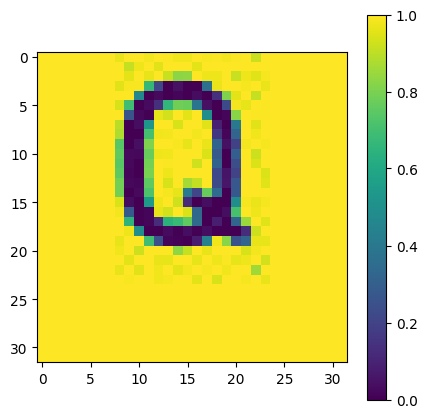

In [59]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes))
])

In [57]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0088 - loss: 4.8566
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0062 - loss: 4.8040
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0104 - loss: 4.8035
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0072 - loss: 4.8034
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0102 - loss: 4.8034
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0096 - loss: 4.8031
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0076 - loss: 4.8029
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0081 - loss: 4.8030
Epoch 9/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0058 - loss: 4.8035
Epoch 10/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0084 - loss: 4.8037


In [52]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 

In [53]:
predictions = probability_model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
classes[np.argmax(predictions[2])]

'Consolai.ttf'

In [55]:
classes[y_test[2]]

'Courbi.ttf'